1.	This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
if not os.path.exists('Auto.csv'):
	import urllib.request
	url = 'https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv'  
	urllib.request.urlretrieve(url, 'Auto.csv')

auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Which of the predictors are quantitative, and which are qualitative?

In [6]:

auto.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

(b) What is the range of each quantitative predictor?

In [7]:
quantitative = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
ranges = auto[quantitative].agg([np.min, np.max])
ranges.loc['range'] = ranges.loc['amax'] - ranges.loc['amin']
ranges


C:\Users\Hai\AppData\Local\Temp\ipykernel_1396\325242479.py:2: FutureWarning: The provided callable <function amin at 0x000002A63D7212D0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ranges = auto[quantitative].agg([np.min, np.max])
C:\Users\Hai\AppData\Local\Temp\ipykernel_1396\325242479.py:2: FutureWarning: The provided callable <function amax at 0x000002A63D721120> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ranges = auto[quantitative].agg([np.min, np.max])


,mpg,displacement,horsepower,weight,acceleration,year
amin,9.0,68.0,46.0,1613.0,8.0,70.0
amax,46.6,455.0,230.0,5140.0,24.8,82.0
range,37.6,387.0,184.0,3527.0,16.8,12.0


(c) What is the mean and standard deviation of each quantitative predictor?

In [8]:
means = auto[quantitative].mean()
stds = auto[quantitative].std()

summary_stats = pd.DataFrame({'Mean': means, 'Standard Deviation': stds})
summary_stats


,Mean,Standard Deviation
mpg,23.445918,7.805007
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


(d) Remove the 10th through 85th observations, and recalculate range, mean, std.

In [ ]:
auto_removed = auto.drop(index=range(9, 85)).reset_index(drop=True)

removed_ranges = auto_removed[quantitative].agg([np.min, np.max])
removed_ranges.loc['range'] = removed_ranges.loc['amax'] - removed_ranges.loc['amin']

removed_means = auto_removed[quantitative].mean()
removed_stds = auto_removed[quantitative].std()

removed_summary_stats = pd.DataFrame({
    'Mean': removed_means,
    'Standard Deviation': removed_stds
})

removed_ranges, removed_summary_stats


C:\Users\Hai\AppData\Local\Temp\ipykernel_1396\2551906613.py:4: FutureWarning: The provided callable <function amin at 0x000002A63D7212D0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  removed_ranges = auto_removed[quantitative].agg([np.min, np.max])
C:\Users\Hai\AppData\Local\Temp\ipykernel_1396\2551906613.py:4: FutureWarning: The provided callable <function amax at 0x000002A63D721120> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  removed_ranges = auto_removed[quantitative].agg([np.min, np.max])


(        mpg  displacement  horsepower  weight  acceleration  year
 amin   11.0          68.0        46.0  1649.0           8.5  70.0
 amax   46.6         455.0       230.0  4997.0          24.8  82.0
 range  35.6         387.0       184.0  3348.0          16.3  12.0,
                      Mean  Standard Deviation
 mpg             24.404430            7.867283
 displacement   187.240506           99.678367
 horsepower     100.721519           35.708853
 weight        2935.971519          811.300208
 acceleration    15.726899            2.693721
 year            77.145570            3.106217)

(e) Investigate the predictors graphically

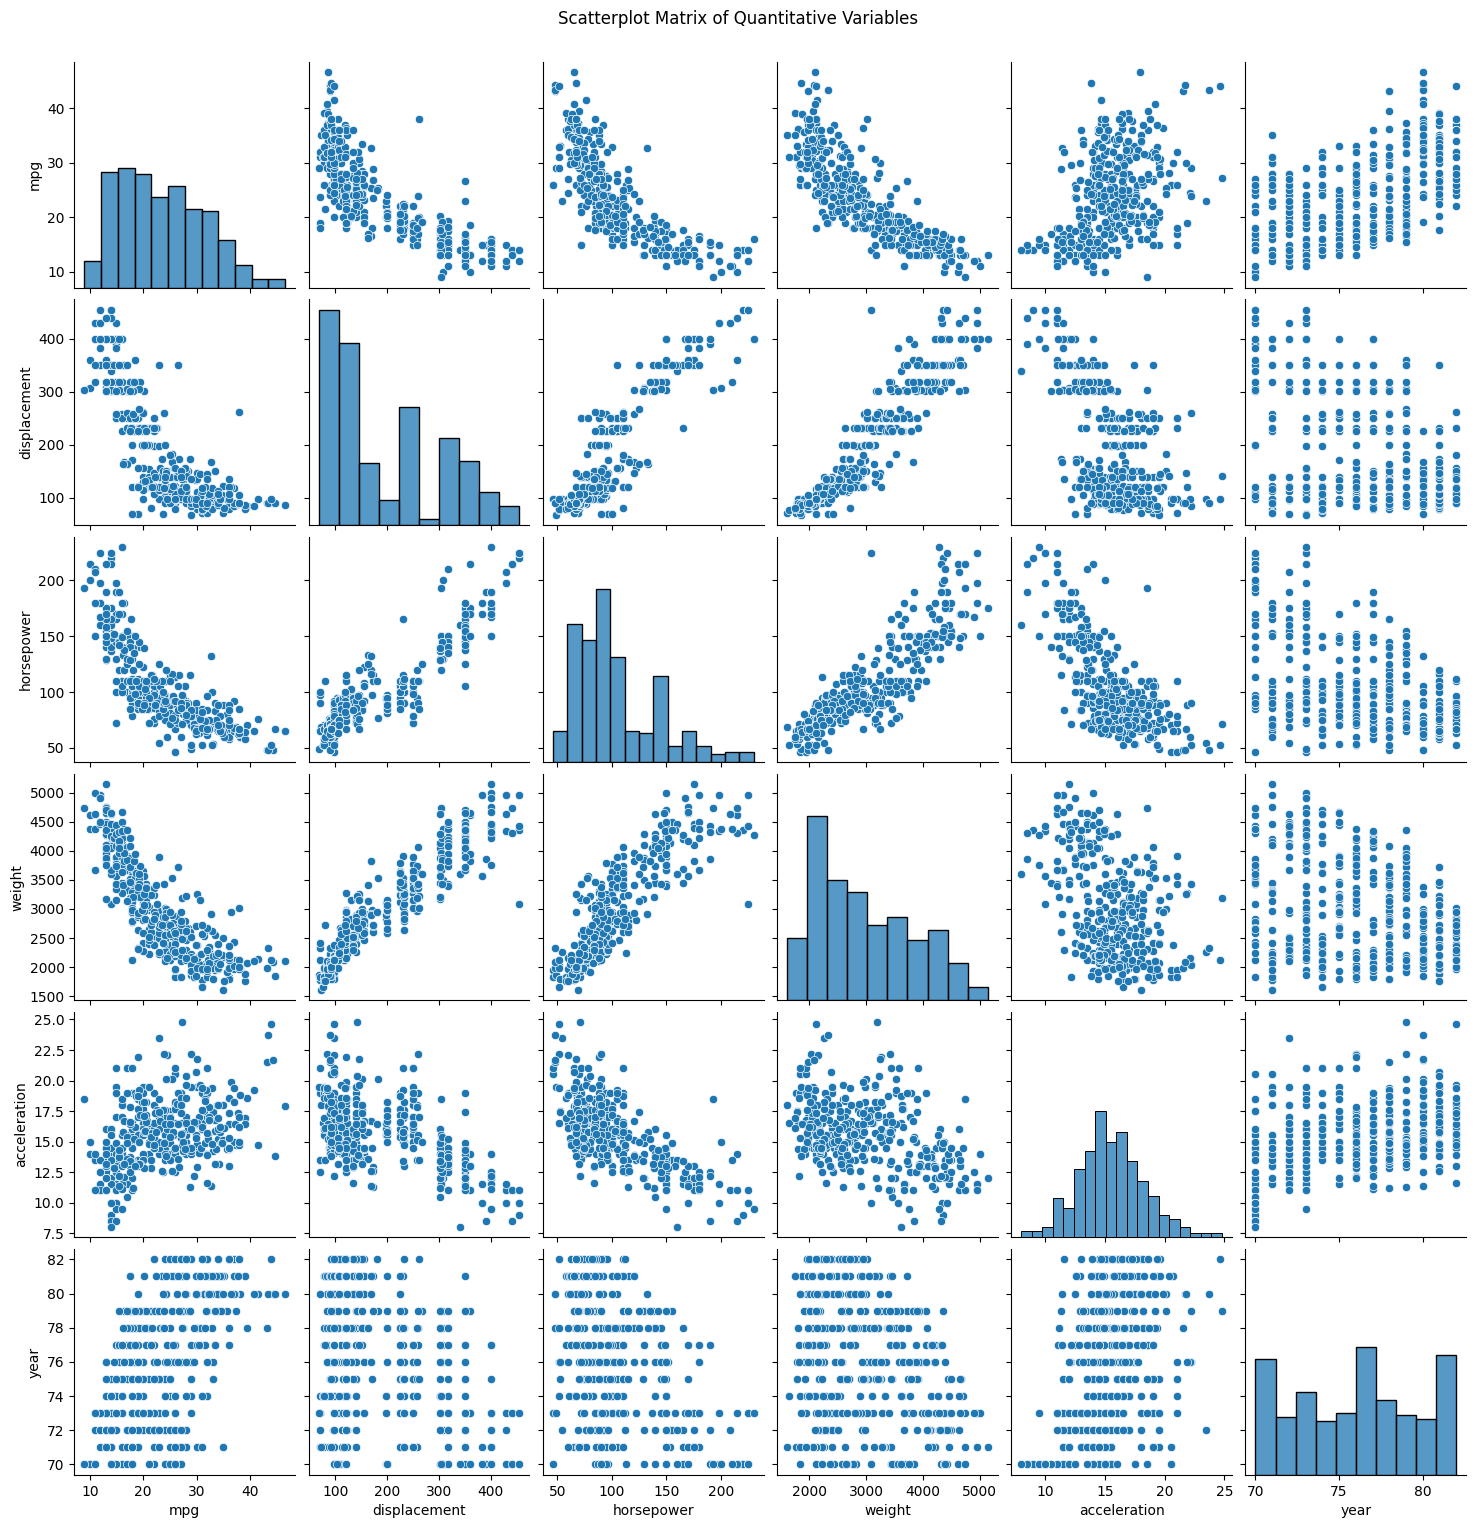

In [14]:

sns.pairplot(auto[quantitative])
plt.suptitle("Scatterplot Matrix of Quantitative Variables", y=1.02)
plt.show()



(f) Do any variables seem useful in predicting mpg?

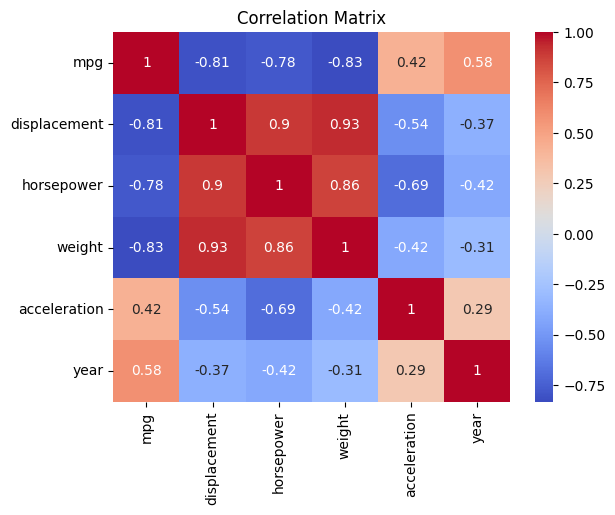

In [11]:
sns.heatmap(auto[quantitative].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
